Project 1

In [9]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math


In [10]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [12]:
%cd '/content/drive/MyDrive/CVHomework1'

[Errno 2] No such file or directory: '/content/drive/MyDrive/CVHomework1'
/content


In [13]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


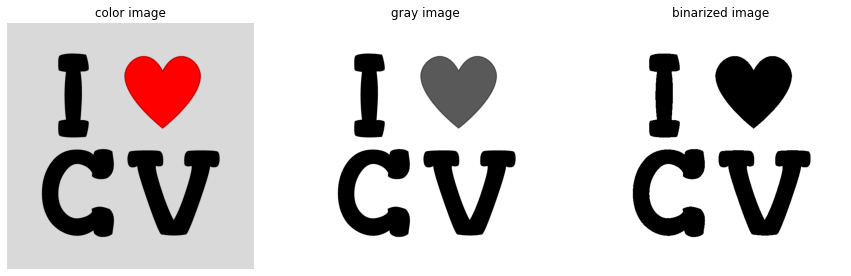

In [14]:
# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in range(height):
        for y in range(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)
                
    return bi_img

# read the image for local directory (same with this .ipynb) 
img = cv2.imread('/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/SourceImages/IloveCV.png')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('color image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Description
---
There are five basic image processing problems in total with specific instructions for each of them. Be sure to read **Submission Guidelines** below. They are important.

## Problems
---

- **Problem 1.a Gaussian filter {15 pts}:** 

  (a) Write a function that takes two arguments, a width parameter and a sigma parameter, and returns a 2D array containing a Gaussian kernel of the desired dimension and variance. The peak of the Gaussian should be in the center of the array. Make sure to normalize the kernel such that the sum of all the elements in the array is 1. Use this function and the OpenCV’s `filter2D` routine to convolve the image and noisy image arrays with a 7x7 Gaussian kernel of sigma=1 and a 13x13 Gaussian kernel of sigma=2. There will be four output images from this problem, namely, image convolved with 7x7, and 13x13, noisy image convolved with 7x7, and 13x13. 

  (b) Write a function that takes an image and its noisy version, and return the Peak Signal-to-Noise Ratio (PSNR) value. Refer to https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio for its mathematical form. Pay attention that you might need to do convertion between different data types.

  Once you fill in and run the codes, the outputs will be saved under `Results` folder. Also images will be displayed in the notebook with PSNR marked in the titles. Please only fill in the missing part as indicated by `##########--WRITE YOUR CODE HERE--##########` and do not modify other parts. The grading for this question will be based on the ground-truth PSNR and your results.

  Lena image is credit to https://web.archive.org/web/20210506192655/https://www.ece.rice.edu/~wakin/images/lena512.bmp.

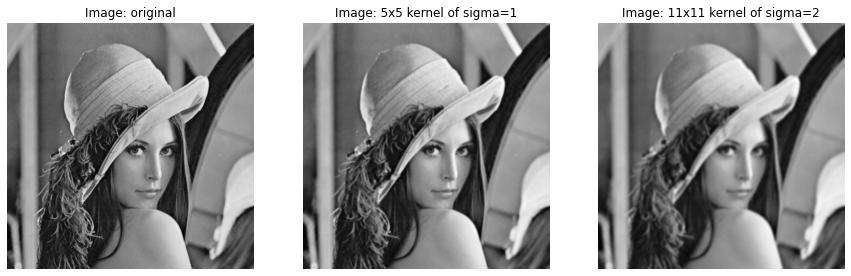

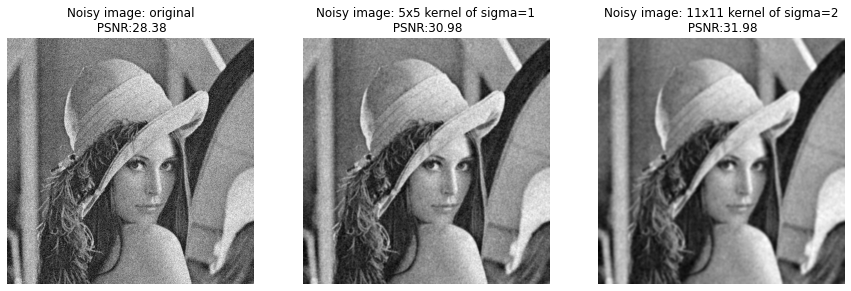

In [24]:
from IPython.core.interactiveshell import error
def genGaussianKernel(width, sigma):    
    # print(width)
    # print(sigma)

    diffaxis = np.linspace(-(width - 1) / 2, (width - 1) / 2, width)
    x = -width
    y = width
    pi = math.pi
    exp = math.exp
    summ = 0
    try:
      upper = -((x**2 + y**2)/(2*(sigma**2)))
      firstpart = 1/(2*pi*(sigma**2))
    except ZeroDivisionError:
      upper = 0
      firstpart = 0
    expo = exp(upper)
    bigGvalue = firstpart*expo
    # print("big G Value = ", bigGvalue)
    # print("diff axis = ", diffaxis)

    kernel_2d = np.zeros([width,width])
    mean  = width//2
    for first in range(0,width):
      for second in range(0,width):
          kernel_2d[first,second] =  np.exp(-((first-mean)**2+(second-mean)**2)/(2*sigma**2))
          summ = summ + kernel_2d[first,second]

    kernel_2d = kernel_2d /(2*np.pi*sigma**2)
    kernel_2d = kernel_2d/ np.sum(kernel_2d)

    # print("kernel 2d = ", kernel_2d)
    # print("sum = ", summ)

    return kernel_2d

def PSNR(img, img_noise):
    sqerror = (img - img_noise)**2
    # print("error : ",sqerror)
    # print("size of error : ", len(errorr))

    MeanSquareError = np.mean(sqerror)

    if MeanSquareError == 0:
      # if mse is zero, no noise is present
      # so PSNR is irrelevant here
      return 100

    # assume 8 bit value, hence max pixel is 2^8, since we take zero in counting, it becomes 256-1=255
    PixelMax = 255.0

    #according to the formula
    PSNR = 20 * np.log10(PixelMax / np.sqrt(MeanSquareError))

    return PSNR
 
# Function to generate image with Gaussian noise
def addGaussianNoise(img, mean, std, seed=0):
    # suppose the input image is 2D gray image
    np.random.seed(seed)
    img_noise = img.astype(np.float32)/255.
    noise = np.random.normal(mean, std, img.shape)
    img_noise = img_noise + noise
    img_noise = np.clip(img_noise, 0., 1.)
    img_noise = (img_noise*255).astype(np.uint8)
    return img_noise

# Load images
img = cv2.imread('/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/SourceImages/lena512.bmp', 0)

# Add Gaussian Noise
img_gnoise = addGaussianNoise(img, 0, 0.1)
PSNR_img_gnoise = PSNR(img, img_gnoise)

# Generate Gaussian kernels
kernel_1 = genGaussianKernel(7, 1)  # 7x7 kernel of sigma=1
kernel_2 = genGaussianKernel(13, 2)  # 13x13 kernel of sigma=2

# Convolve kernel with (noisy) image
img_kernel1 = cv2.filter2D(img, -1, kernel_1)
img_kernel2 = cv2.filter2D(img, -1, kernel_2)
img_gnoise_kernel1 = cv2.filter2D(img_gnoise, -1, kernel_1)
img_gnoise_kernel2 = cv2.filter2D(img_gnoise, -1, kernel_2)

PSNR_img_gnoise_kernel1 = PSNR(img, img_gnoise_kernel1)
PSNR_img_gnoise_kernel2 = PSNR(img, img_gnoise_kernel2)

# Write result images
if not os.path.exists("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results"):
  os.makedirs("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results")
cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P1_01.jpg", img_kernel1)
cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P1_02.jpg", img_kernel2)
cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P1_03.jpg", img_gnoise_kernel1)
cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P1_04.jpg", img_gnoise_kernel2)

# Plot results
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Image: original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_kernel1, 'gray')
plt.title('Image: 5x5 kernel of sigma=1')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_kernel2, 'gray')
plt.title('Image: 11x11 kernel of sigma=2')
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noisy image: original\n PSNR:{0:.2f}'.format(PSNR_img_gnoise))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gnoise_kernel1, 'gray')
plt.title('Noisy image: 5x5 kernel of sigma=1\n PSNR:{0:.2f}'
                        .format(PSNR_img_gnoise_kernel1))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_gnoise_kernel2, 'gray')
plt.title('Noisy image: 11x11 kernel of sigma=2\n PSNR:{0:.2f}'
                        .format(PSNR_img_gnoise_kernel2))
plt.axis("off")

plt.show()

- **Problem 1.b Median filter {15 pts}:** \\
(a) Write a function to generate an image with salt and pepper noise. The function takes three arguments, the input image, the probability that a pixel location has salt-pepper noise and a random seed for repitability. A simple implementation can be to select pixel locations with probability 'p' where noise occurs and then with equal probability set the pixel value at those location to be 0 or 255.(**Hint: Use np.random.uniform and np.random.choice**) 

 (b) Write a function to implement a median filter. The function takes two arguments, an image and a window size (if window size is 'k', then a kxk window is used to determine the median pixel value at a location) and returns the output image. **Do not** use any inbuilt library (like scipy.ndimage_filter) to directly generate the result. (**Hint: Use cv2.copyMakeBorder to add borders**)  

 You need to generate two noisy images corrupted by salt-and-pepper noise with noise probability equals 0.1 and 0.2. And then use median filter of window size=5 to denoise the two noisy images. You also need to denoise them with Gaussian filters. Try different parameters of Gaussian filters to get as higher PSNR as possible. Fill in all the missing parts and do not modify others.


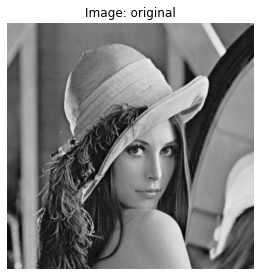

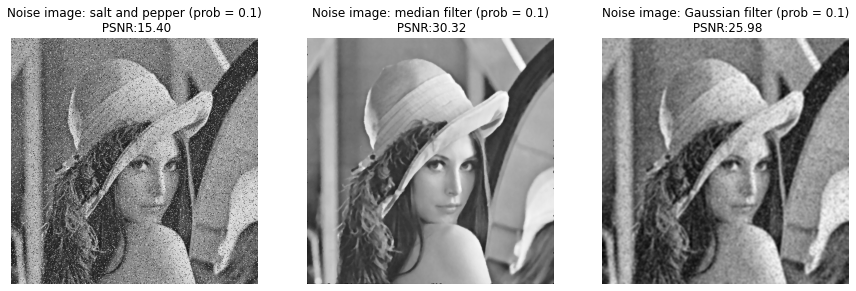

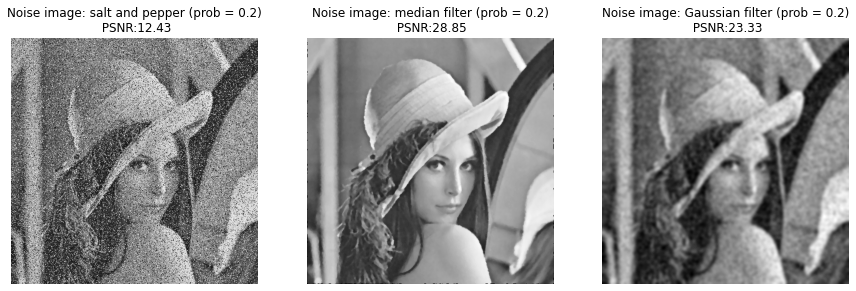

In [23]:
# Function to generate image with salt and pepper noise
def addSaltPepperNoise(img, prob = 0.1, seed=0):
  # suppose the input image is 2D gray image
  # with probability=prob each pixel is replaced with a pepper(0)
  # or a salt(255) in equal chance
  np.random.seed(seed)  
  row, col = img.shape
  img_noise = np.zeros((row, col))

  SaltPepperNoise = np.random.uniform(0, 1, (row, col))
  for a in range(row):
    for b in range(col):
      if SaltPepperNoise[a][b] <= prob :
        EitherSaltOrPepper = np.random.choice(2,1)
        if EitherSaltOrPepper[0] == 1 :
          img_noise[a][b] = 255
        else :
          img_noise[a][b] = 0
      else :
        img_noise[a][b] = img[a][b]
  return img_noise
  
# Function to apply median filter (window size kxk) on the input image  
def medianFilter(img, window_size = 5):
  padSize = int(window_size / 2)
  
  # Add k black pixel padding to the top, bottom, left and right 
  # so median filter window can run over all pixels of original image
  imgBorder = cv2.copyMakeBorder(img, padSize , padSize, padSize, padSize,
                                          cv2.BORDER_CONSTANT, value=(0, 0, 0))
  row, col = imgBorder.shape
  img_filtered = imgBorder.copy()
  
  for a in range(padSize, row-padSize):
    for b in range(padSize, col-padSize):
      frame = imgBorder[a-padSize:a+padSize+1, b-padSize:b+padSize+1]
      finalMedian = np.median(frame)
      img_filtered[a][b] = finalMedian
  # Crop out the k pixel padding added before returning output image
  img_filtered = img_filtered[padSize:row-padSize, padSize:col-padSize]
  return img_filtered


img_spnoise_p1 = addSaltPepperNoise(img, 0.1, 0)
PSNR_img_spnoise_p1 = PSNR(img, img_spnoise_p1)

img_spnoise_p1_MedianFilter = medianFilter(img_spnoise_p1, 5)
PSNR_img_spnoise_p1_MedianFilter = PSNR(img,img_spnoise_p1_MedianFilter)

img_spnoise_p2 = addSaltPepperNoise(img, 0.2, 0)
PSNR_img_spnoise_p2 = PSNR(img, img_spnoise_p2)

img_spnoise_p2_MedianFilter = medianFilter(img_spnoise_p2, 5)
PSNR_img_spnoise_p2_MedianFilter = PSNR(img,img_spnoise_p2_MedianFilter)

# Generate Gaussian kernels
kernel_1 =  genGaussianKernel(7,2)
kernel_2 =  genGaussianKernel(15,3)

# Convolve filters with image and noisy image
img_spnoise_p1_GaussianFilter = cv2.filter2D(img_spnoise_p1, -1, kernel_1)
PSNR_img_spnoise_p1_GaussianFilter = PSNR(img, img_spnoise_p1_GaussianFilter)

img_spnoise_p2_GaussianFilter = cv2.filter2D(img_spnoise_p2, -1, kernel_2)
PSNR_img_spnoise_p2_GaussianFilter = PSNR(img, img_spnoise_p2_GaussianFilter)

cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P1_05.jpg", img_spnoise_p1_MedianFilter)    
cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P1_06.jpg", img_spnoise_p1_GaussianFilter)    
cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P1_07.jpg", img_spnoise_p2_MedianFilter)    
cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P1_08.jpg", img_spnoise_p2_GaussianFilter)  

# Plot results
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Image: original')
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_spnoise_p1, 'gray')
plt.title('Noise image: salt and pepper (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_spnoise_p1_MedianFilter, 'gray')
plt.title('Noise image: median filter (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1_MedianFilter))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_spnoise_p1_GaussianFilter, 'gray')
plt.title('Noise image: Gaussian filter (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1_GaussianFilter))
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_spnoise_p2, 'gray')
plt.title('Noise image: salt and pepper (prob = 0.2)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p2))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_spnoise_p2_MedianFilter, 'gray')
plt.title('Noise image: median filter (prob = 0.2)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p2_MedianFilter))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_spnoise_p2_GaussianFilter, 'gray')
plt.title('Noise image: Gaussian filter (prob = 0.2)\n PSNR:{0:.2f}'
                  .format(PSNR_img_spnoise_p2_GaussianFilter))
plt.axis("off")

plt.show()

- **Problem 2 Separable filters {10 pts}:** The Gaussian kernel is separable, which means that convolution with a 2D Gaussian can be accomplished by convolving the image with two 1D Gaussians, one in the x direction and the other one in the y direction. Perform an 13x13 convolution with sigma = 2 from question 1 using this scheme. You can still use `filter2D` to convolve the images with each of the 1D kernels. Verify that you get the same results with what you did with 2D kernels by computing the difference image between the results from the two methods. This difference image should be close to black. Include your code and results in your colab Notebook file. There is no output image from this part. Be sure to display the result images in the notebook.

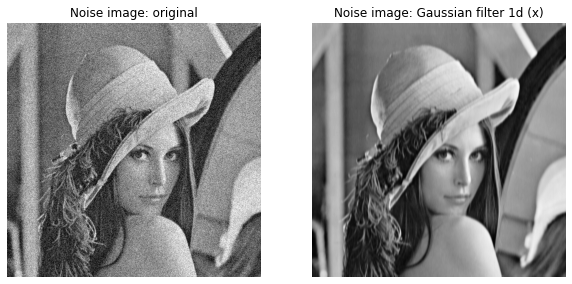

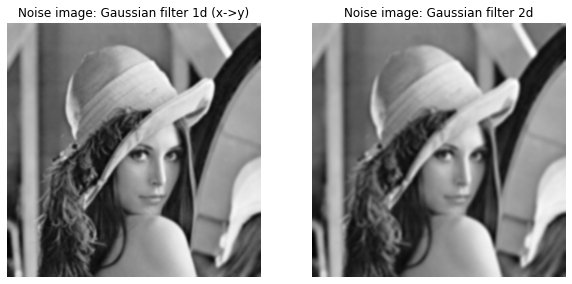

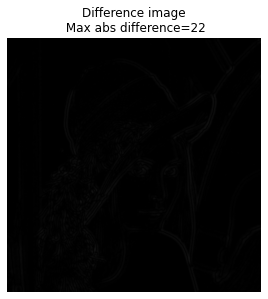

In [18]:
def genGausKernel1D(length, sigma):  

    # defining 1d kernel
    kernel_1d = np.zeros((length, 1))
    
    # variables to put in formula
    c = int(length / 2)
    sigmaSquared = sigma * sigma
    coefficient = 1 / math.sqrt(2 * math.pi * sigmaSquared)
    
    for a in range(length):
      numer = ((a - c)**2)
      denom = (2 * sigmaSquared)
      raised = -numer/denom
      expo = math.e ** raised
      kernel_1d[a] = coefficient * expo
    
    # normalising kernel array
    kernel_1d = kernel_1d / kernel_1d.sum()

    return kernel_1d


# Generate two 1d kernels here
width = 13
sigma = 2
kernel_x = genGausKernel1D(width, sigma)
kernel_y = np.transpose(kernel_x.reshape((-1,1)))

# Generate a 2d 13x13 kernel with sigma of 2 here as before
kernel_2d = genGaussianKernel(11,3)

# Convolve with img_gnoise
img_gnoise_kernel1d_x =  cv2.filter2D(img, -1, kernel_x)
img_gnoise_kernel1d_xy =  cv2.filter2D(img_gnoise_kernel1d_x, -1, kernel_y )
img_gnoise_kernel2d = cv2.filter2D(img, -1, kernel_2d)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noise image: original')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gnoise_kernel1d_x, 'gray')
plt.title('Noise image: Gaussian filter 1d (x)')
plt.axis("off")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gnoise_kernel1d_xy, 'gray')
plt.title('Noise image: Gaussian filter 1d (x->y)')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gnoise_kernel2d, 'gray')
plt.title('Noise image: Gaussian filter 2d')
plt.axis("off")

# Compute the difference array here
img_diff =  np.abs((img_gnoise_kernel1d_xy.astype(np.float32)
       -img_gnoise_kernel2d.astype(np.float32))).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.imshow(img_diff, 'gray', vmin=0, vmax=255)
plt.title('Difference image\n Max abs difference={0:d}'
                        .format(np.max(img_diff)))
plt.axis("off")
plt.show()

- **Problem 3 Difference of Gaussians {20 pts}:** Difference of Gaussians (DoG) is a feature enhancement algorithm. You can obtain a DoG by subtracting a Gaussian filter of sigma=K\*s from a Gaussian filter of sigma=s. In this question, we will use kernel_size=15, K=1.9, and sigma=2. Plot the DoG kernel using the `Matplotlib` function `plot`. Use the `Matplotlib` function `plot_surface` to generate a 3D plot of DoG. Include your code and results in your Colab Notebook file. Apply the filter to the noisy image generated in the previous question. 

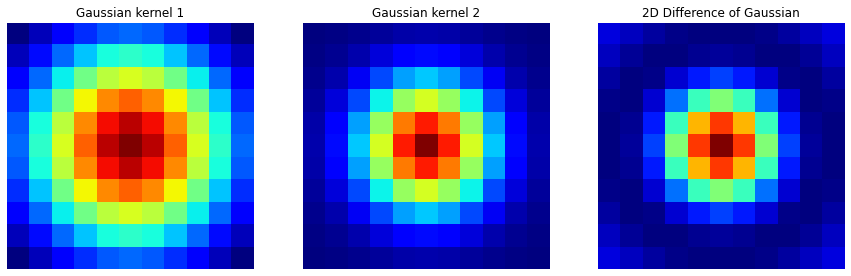

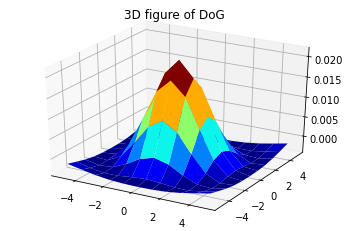

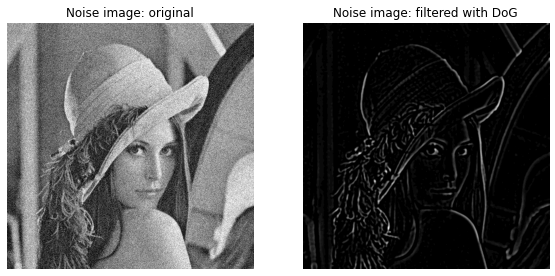

In [25]:
# Create your Gaussian kernel
Gaussian_kernel_1 = genGaussianKernel(11,1.6*2)
Gaussian_kernel_2 = genGaussianKernel(11,2)

# Create your Difference of Gaussian
DoG = np.subtract(Gaussian_kernel_2, Gaussian_kernel_1)

# Plot Gaussian and Laplacian
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_kernel_1, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel 1')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(Gaussian_kernel_2, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel 2')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(DoG, interpolation='none', cmap=cm.jet)
plt.title('2D Difference of Gaussian')
plt.axis("off")

# Plot the 3D figure of DoG


xcoord = np.linspace(-5,5,11)
ycoord = np.linspace(-5,5,11)
finX, finY = np.meshgrid(xcoord, ycoord)

finFigure = plt.figure()
letsPlot = finFigure.add_subplot(111, projection ='3d')
letsPlot.plot_surface(finX,finY,DoG, cmap=cm.jet)
plt.title('3D figure of DoG')



img_gnoise_DoG = cv2.filter2D(img, -1, DoG)

# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noise image: original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gnoise_DoG, 'gray')
plt.title('Noise image: filtered with DoG')
plt.axis("off")

cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P3_01.jpg", img_gnoise_DoG);


- **Problem 4 Histogram equalization {20 pts}:** Refer to Szeliski's book on section 3.4.1, and within that section to eqn 3.9 for more information on histogram equalization. Getting the histogram of a grayscale image is incredibly easy with python. A histogram is a vector of numbers. Once you have the histogram, you can get the cumulative distribution function (CDF) from it. Then all you have left is to find the mapping from each value [0,255] to its adjusted value (just using the CDF basically). **DO NOT** use **cv2.equalizeHist()** directly to solve the exercise! We will expect to see in your code that you get the PDF and CDF, and that you manipulate the pixels directly (avoid a for loop, though). The ground-truth image is credit to https://github.com/yinhaoz/denoising-fluorescence. It is a real Fluorescence Microscopy Image with three R/G/B channels. You need to transform it into HSV space before doing histogram equalization. There will be one output image from this part which is the histogram equalized image. It will be compared against the ground truth.

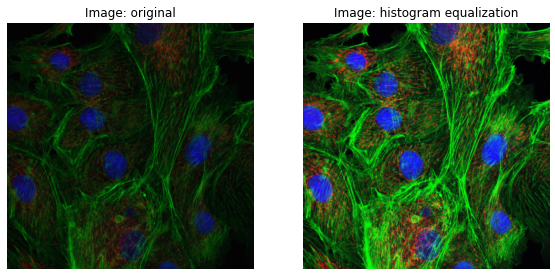

In [26]:
def PDF(img, bins) :
  histogram = np.zeros(bins)
  temp = 0
  for a in img:
    histogram[a] += 1
    temp += 1

  # probability distribution function of img
  pdf = histogram/temp

  return histogram, temp, pdf

def CDF(histogram, pdf) :
  p = iter(histogram)
  q = [next(p)]
  for a in p :
    q.append(q[-1]+a)

  # cummulative distribution function of img
  cdf = np.array(q)
  return cdf

def histogram_equalization(img):  
    hsvImage = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    Hue, Sat, Val = cv2.split(hsvImage)
    bin = 256
    # 256 bins because Value ranges from 0 to 255

    # flatten image into 1d array
    flat_img_in = Val.flatten()

    # get PDF and CDF of image 
    histo, numPix, PDFuncImg = PDF(img, bin)
    CDFunc = CDF(histo, PDFuncImg)

    # to renormalise CDF values to get result between 0 and 255
    M = (CDFunc - CDFunc.min()) * (bin - 1)
    N = CDFunc.max() - CDFunc.min()
    # final cummulative distribution function
    CDFuncImg = M/N

    # cast to unit8
    CDFuncImg = CDFuncImg.astype('uint8')

    # fetch value from CDF of Image for all Flattened
    ValEqual = CDFuncImg[flat_img_in]

    # resizing values into original shape
    ValResized = np.reshape(ValEqual, Val.shape)
    tempImg = cv2.merge([Hue, Sat, ValResized])

    # converting it back to BGR
    img_hist_eq = cv2.cvtColor(tempImg, cv2.COLOR_HSV2BGR)
    
    return img_hist_eq

# Read in input images
imgB = cv2.imread('/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/SourceImages/BPAE_Cells.png', cv2.IMREAD_COLOR)

# Histogram equalization
imgB_hist_eq = histogram_equalization(imgB)

# Plot results
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB))
plt.title('Image: original')
plt.axis("off")

# Plot results
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(imgB_hist_eq, cv2.COLOR_BGR2RGB))
plt.title('Image: histogram equalization')
plt.axis("off")

# Write out results
cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P4_01.jpg", imgB_hist_eq);

- **Problem 5 Low/high pass filters and image sharpening {20 pts}:**  Start with the following tutorials: \\
http://docs.opencv.org/master/de/dbc/tutorial_py_fourier_transform.html
http://docs.opencv.org/2.4/doc/tutorials/core/discrete_fourier_transform/discrete_fourier_transform.html <br>

 For your LPF (low pass filter), mask a 80x80 window of the center of the FT (Fourier Transform) image (the low frequencies). For the HPF, mask a 60x60 window excluding the center. You may need to do low/high pass filter for each R/G/B channel. The filtered low and high pass images will be displayed and saved.

 Then you will need to do image sharpening by mixing the high pass filtered image with the original one. Write a function that takes two images and a coefficient alpha and return the mixed image. Use alpha=0.2 in this question. The sharpened image will be displayed and saved.

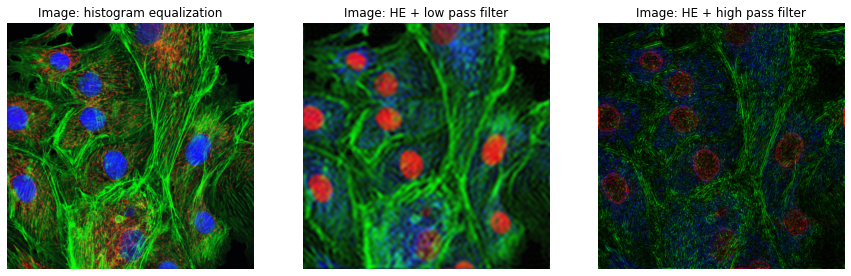

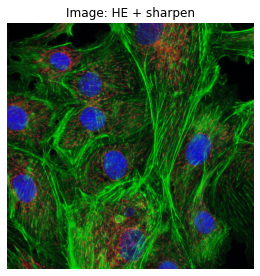

In [27]:
def FourierT(img, mask):

    rows = len(img) 
    cols = len(img[0])
    paddingVertical = cv2.getOptimalDFTSize(rows) - rows
    paddingHorizontal = cv2.getOptimalDFTSize(cols) - cols

    paddedImg = cv2.copyMakeBorder(img, 0, paddingVertical, 0, paddingHorizontal, cv2.BORDER_CONSTANT, value=0)

    # Fourier transform applied
    dft = cv2.dft(np.float32(paddedImg), flags=cv2.DFT_COMPLEX_OUTPUT) 
    shiftedDFT = np.fft.fftshift(dft)

    maskedDFT = mask * shiftedDFT

    # Inverse Fourier transform applied
    inverseDFT = np.fft.ifftshift(maskedDFT)
    maskedImage = cv2.idft(inverseDFT)
    maskedImage = cv2.magnitude(maskedImage[:,:,0], maskedImage[:,:,1])
    maskedImage = cv2.normalize(maskedImage, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return maskedImage

def low_pass_filter(img_in, mask_size):
    B, G, R = cv2.split(img_in)

    # for low pass, mask of size mask_size * mask_size
    row, col = B.shape 
    midrow = row//2
    midcol =  col//2
    
    mask = np.zeros((row,col,2))
    mask[midrow - mask_size//2: midrow + mask_size//2, midcol - mask_size//2: midcol + mask_size//2] = 1

    # merging R G B
    newB, newG, newR = FourierT(B, mask), FourierT(G, mask), FourierT(R, mask) 
    img_out = cv2.merge([newB, newG, newR])
    img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB) 
    return img_out



def high_pass_filter(img_in, mask_size):
    # Write high pass filter here
    # Fill in your code here
    B, G, R = cv2.split(img_in)

    # for low pass, mask of size mask_size * mask_size
    row, col = B.shape
    midrow = row//2
    midcol = col//2
    
    mask = np.ones((row,col,2), np.uint8)
    
    mask[midrow - mask_size//2: midrow + mask_size//2, midcol - mask_size//2: midcol + mask_size//2] = 0
    
    # merging R G B
    newB, newG, newR = FourierT(B, mask), FourierT(G, mask), FourierT(R, mask)

    img_out = cv2.merge([newB, newG, newR])
    img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
    return img_out

def mixImages(img_a, img_b, alpha=0.1):
    # alpha is the weight of img_b
    A = img_a * (1.0 - alpha) 
    B = img_b * alpha
    img_mix = A + B
    return img_mix.astype(np.uint8)

# Low and high pass filter
imgB_hist_eq_lp  = low_pass_filter(imgB_hist_eq, 80)
imgB_hist_eq_hp = high_pass_filter(imgB_hist_eq, 60)

# Plot results
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imgB_hist_eq, cv2.COLOR_BGR2RGB))
plt.title('Image: histogram equalization')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(imgB_hist_eq_lp, cv2.COLOR_BGR2RGB))
plt.title('Image: HE + low pass filter')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(imgB_hist_eq_hp, cv2.COLOR_BGR2RGB))
plt.title('Image: HE + high pass filter')
plt.axis("off")

# Write out results
cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P5_01.jpg", imgB_hist_eq_lp);
cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P5_02.jpg", imgB_hist_eq_hp);

# threshold out low values
mask_sharpen = (imgB_hist_eq_hp>20).astype(np.uint8)
imgB_hist_eq_sharpen = mixImages(imgB_hist_eq, imgB_hist_eq_hp*mask_sharpen, alpha=0.2)

fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imgB_hist_eq_sharpen, cv2.COLOR_BGR2RGB))
plt.title('Image: HE + sharpen')
plt.axis("off");

cv2.imwrite("/content/drive/MyDrive/CSE 527 CV/Chauhan_JugalDeepak_115059432_hw1/Results/P5_03.jpg", imgB_hist_eq_sharpen);